# Plesio-Geostrophy Model - Spectral Expansions

In [1]:
import numpy as np
from scipy import special as specfun
import matplotlib.pyplot as plt

## Regularity for equatorial magnetic field

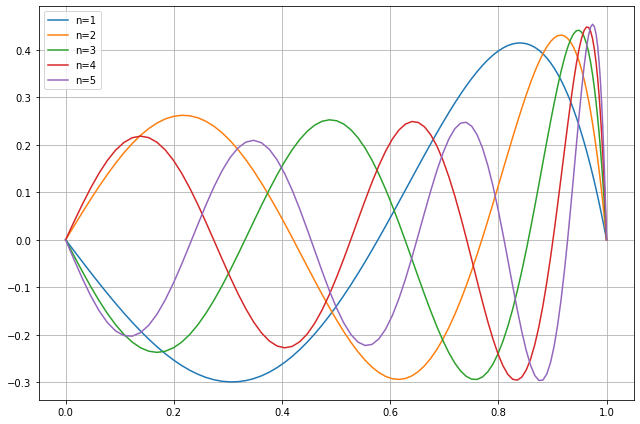

In [2]:
m_mode = 2

alpha = 2
beta = m_mode - 3/2
leading_power = np.abs(np.abs(m_mode) - 1)
n_array = np.arange(1, 6)

xi, _ = specfun.roots_jacobi(100, alpha, beta)
xi = np.r_[-1, xi, 1]
s = np.sqrt((1 + xi)/2)

basis_array = np.zeros((n_array.size, s.size))
for i, n in enumerate(n_array):
    basis_array[i, :] = specfun.jacobi(n, alpha, beta)(2*s**2 - 1)
s_basis_array = s**leading_power*(1 - s**2)*basis_array

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9.0, 6.0), layout="tight")

# ax = axes[0]
# for i, n in enumerate(n_array):
#     ax.plot(s, basis_array[i], label="n={:d}".format(n))
# ax.legend()
# ax.grid()

for i, n in enumerate(n_array):
    ax.plot(s, s_basis_array[i], label="n={:d}".format(n))
ax.legend()
ax.grid()

plt.show()